In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [97]:
df = pd.read_csv('data/univ-latencies/univ-latencies.txt')

In [89]:
df.head(2)

,acu-edu,acadiau-ca,adrian-edu,agnesscott-edu,aims-edu,uni-freiburg-de,alfred-edu,alvernia-edu,alverno-edu,american-edu,...,williams-edu,wsc-nodak-edu,winona-msus-edu,wpi-edu,wright-edu,yale-edu,yu-edu,yorku-ca,upenn-edu,ens-fr
0,396,381,488,506,333,1327,132,70,456,121,...,220,1898,434,125,304,94,460,347,532,429
1,271,261,488,504,276,1084,89,23,409,34,...,263,1032,294,74,269,252,98,265,233,293


In [158]:
mini = df.ix[:,:10]

In [159]:
mini.head(2)

,acu-edu,acadiau-ca,adrian-edu,agnesscott-edu,aims-edu,uni-freiburg-de,alfred-edu,alvernia-edu,alverno-edu,american-edu
0,396,381,488,506,333,1327,132,70,456,121
1,271,261,488,504,276,1084,89,23,409,34


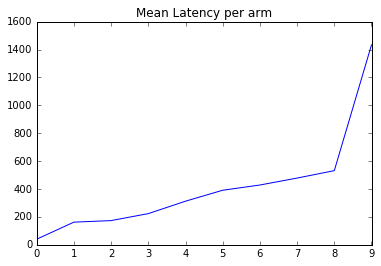

In [160]:
plt.title("Mean Latency per arm")
plt.plot(sorted(mini.mean()))

In [161]:
optimal = mini.min(axis=1).mean()
worst = mini.max(axis=1).mean()
random = np.mean(
    [ np.mean([np.random.choice(mini.ix[:, t]) for t in range(mini.shape[1])]) for _ in range(30) ]
)
print("optimal strategy (oracle) mean reward: %.2f" % optimal)
print("worst: %.2f" % worst)
print("random: %.2f" % random)
print("improvement ratio opt/rand: %dx" % (random/optimal))

optimal strategy (oracle) mean reward: 26.54
worst: 1933.03
random: 449.90
improvement ratio opt/rand: 16x


In [234]:
reward_sum_per_arm = np.ones(mini.shape[1])
actions_per_arm = np.ones(mini.shape[1])
actions = []
regret = []
for t in range(mini.shape[0]):
    mean_latency_per_arm = reward_sum_per_arm/actions_per_arm
    mean_latency_per_arm = 1/mean_latency_per_arm
    mean_latency_per_arm = mean_latency_per_arm / np.sum(mean_latency_per_arm)
    a = np.random.choice(range(len(mean_latency_per_arm)), p=mean_latency_per_arm)
    r = mini.ix[t, a]
    reward_sum_per_arm[a] += r
    actions_per_arm[a] += 1
    actions += [a]
    regret += [r - mini.ix[t,:].min()]

In [235]:
mean_lat = np.sum(reward_sum_per_arm) / np.sum(actions_per_arm)
print("mean latency achieved: %.2f" % mean_lat)
print("vs random: %.2fx" % (mean_lat/random))
print("vs optim : %.2fx" % (mean_lat/optimal))
print("mean regret: %.2f" % np.mean(regret))

mean latency achieved: 193.73
vs random: 0.43x
vs optim : 7.30x
mean regret: 168.61


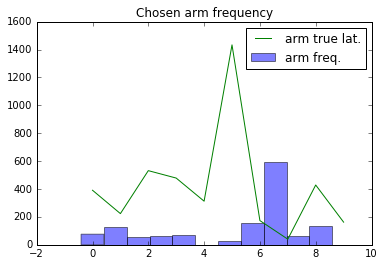

In [236]:
plt.title('Chosen arm frequency')
plt.hist(actions, bins=arms.shape[0], alpha=.5, label='arm freq.', align='left')
plt.plot(mini.mean().values, label='arm true lat.')
plt.legend()

In [242]:
means = mini.mean()
comp = pd.DataFrame(pd.concat([
            means, 
            pd.Series(actions_per_arm, index=means.index),
            pd.Series(reward_sum_per_arm/actions_per_arm, index=means.index),
        ], axis=1).values, columns=['true_mean_lat', 'chosen_freq', 'exp_mean_lat'])
comp = comp.sort_values(by='true_mean_lat')
comp

,true_mean_lat,chosen_freq,exp_mean_lat
7,40.316679,594,37.156566
9,162.451874,136,378.992647
6,173.508450,154,127.655844
1,223.562821,128,165.085938
4,312.650257,69,299.550725
0,391.088170,77,285.597403
8,428.579721,61,397.819672
3,478.344600,66,407.272727
2,531.591477,56,429.160714
5,1433.167524,30,1112.200000


In [229]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
cumulated_mean_regret = np.cumsum(regret)/np.cumsum(np.ones(len(regret)))
plt.title('cumulated mean regret')
plt.plot(cumulated_mean_regret, alpha=.5)
#plt.plot(moving_average(cumulated_mean_regret, 30), 'g--')